In [1]:
# 开始考虑统计学之前，思考这三个问题
# 1.假设你有一个装满彩色球的袋子，你闭上眼并且从袋子里拿一个球
# 你能据此说出袋子里彩色球的情况吗？
# 2.你来到一个陌生的城市并且你还需要一辆出租车。在晚上你只能看到出租车上的数字标志
# 你知道他们代表连续的出租车顺序，你能知道这座城市有多少辆出租车吗？
# 3.你已经进入考试两次了，你想知道是否值得第三次进入考试是你的得分提高
# 因为结果只显示最后一次的成绩，你担心第三次的结果变糟糕，你如何决定是否再进行一次？

In [2]:
# 统计学提供了一个结构性方法来解决上述问题。这个是很重要的，因为我们很容易被自己的直觉和偏差所欺骗。
# 不幸的是，这个领域不止提供一种单一的方法。这意味着尽管许多问题可以被解决，但这些不是容易证明，解释或理解的。
# 根本上来讲，当我们只用数据开始的时候，我们缺少潜在的概率密度。
# 这移除了关键结构，我们不得不抵消，然而我们选择处理数据。
# 接下来我们考虑一些最有用的统计学工具在Python的库中和潜在的方法。

In [3]:
# scipy.stats
# 尽管这有一些基础的统计函数在Numpy中，真正统计函数库在scipy.stats中
import scipy.stats

In [4]:
n = scipy.stats.norm(0, 10)
# n是正态随机分布变量，均值是0，标准差σ=10。这两个参数更通用的表示为位置和比例
# 现在我们可以调用方法来计算均值等
n.mean()

0.0

In [5]:
# 我们也可以计算高阶矩，比如计算第四阶矩
# 阶矩是统计学中用来描述数据分布形状和特征的重要概念之一。
# 在概率论和统计学中，阶矩是指随机变量的幂的期望。
# 对于一个随机变量X，它的r阶矩可以表示为E(X^r)，其中E表示期望值运算符。
# 阶矩提供了关于数据分布的信息，例如均值是一阶矩，方差是二阶矩。
# 高阶矩提供了更多关于数据分布的信息，可以用于描述偏态、峰度等特征。
n.moment(4)

30000.0

In [6]:
# 连续随机变量的公共方法主要包括
# rvs: random variates 随机变量生成
# pdf: probability density function 概率密度函数
# cdf: cumulative distribution function累积分布函数
# sf: survival Function (1-CDF) 生存函数
# ppf: percent point function (Inverse of CDF) 百分位点函数
# isf: inverse survival function (Inverse of SF) 逆生存函数
# stats: mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis 统计指标均值，方差，偏度，峰度
# moment: non-central moments of the distribution 非中心矩的分布

In [7]:
# 例如我们可以计算特定点的pdf
n.pdf(0) # 0点的pdf

0.03989422804014327

In [8]:
# 或者相同随机变量的cdf
n.cdf(0)

0.5

In [9]:
# 你也可以从这个分布中创建一个样本
n.rvs(10)

array([ -1.62702271,  30.15903984, -12.86062361,  12.46583098,
        -2.48900822, -13.38361654, -16.47866322,   7.15792312,
        -5.03254984,  -3.50825828])

In [12]:
# 许多普通的统计学测试已经内置了。例如Shapiro-Wilks测试原假设这个数据来自一个正态分布
scipy.stats.shapiro(n.rvs(100))
# 第二个值是p值，越小原假设越成立

ShapiroResult(statistic=0.9817699790000916, pvalue=0.18218466639518738)

In [13]:
# Sympy有他自己的更小，但也是非常有用的统计学模型，可以处理很多统计变量
from sympy import stats, sqrt, exp, pi
X = stats.Normal('x', 0, 10) # 创建一个正态随机变量

In [14]:
# 我们可以获得概率密度函数如
from sympy.abc import x
stats.density(X)(x)

sqrt(2)*exp(-x**2/200)/(20*sqrt(pi))

In [15]:
sqrt(2)*exp(-x**2/200)/(20*sqrt(pi))

sqrt(2)*exp(-x**2/200)/(20*sqrt(pi))

In [16]:
# 我们可以计算cdf
stats.cdf(X)(0)

1/2

In [17]:
# 在输出上你可以在数值上计算它通过使用evalf()方法。Sympy提供简洁的方式来考虑标准概率问题
# 方法为stats.P函数
stats.P(X>0) # prob X>0?

1/2

In [19]:
# 这里也有一个对应的期望函数，stats.E你可以来计算复杂的期望值
stats.E(abs(X)**(1/2)).evalf()

2.59995815363879

In [1]:
# 这有一些其他的python统计模型。两个重要的模型分别为Seaborn和Statsmodels。Starsmodels用来补充Scipy的描述统计，
# 大的统计模型的判断推理。Statsmodels包括普遍的线性模型，鲁棒线性模型和时间序列分析，强调在计量经济学数据和问题中的应用
# 这两个模型都紧密结合在Matplotlib，Numpy，Scipy,和其他的Python科学库中

In [2]:
from scipy import stats
u = stats.uniform()
xn = lambda i : u.rvs(i).max()
xn

<function __main__.<lambda>(i)>

In [3]:
xn(5)

0.9695649333384546

In [6]:
import numpy as np
np.mean([xn(60) > 0.95 for i in range(1000)])

0.964

In [7]:
x = np.arange(100)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [18]:
y = [xn(i) for i in x[1:]]
y1 = [xn(i) for i in x[1:]]
y3 = [xn(i) for i in x[1:]]
y4 = [xn(i) for i in x[1:]]
len(y)

99

In [14]:
len(x[1:])

99

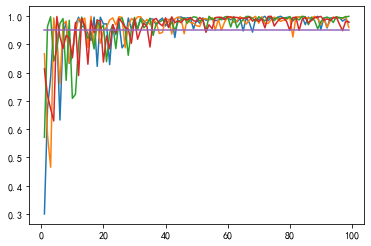

In [21]:
import matplotlib.pyplot as plt
plt.plot(x[1:], y)
plt.plot(x[1:], y1)
plt.plot(x[1:], y3)
plt.plot(x[1:], y4)
plt.plot(x[1:], [0.95 for i in range(99)])

In [22]:
np.log(1-.99)/np.log(.95)

89.78113496070968

In [23]:
np.mean([xn(90) > 0.95 for i in range(1000)])

0.992

In [28]:
np.array(list(zip(range(3), range(1, 3))))/2

array([[0. , 0.5],
       [0.5, 1. ]])

In [32]:
list(zip(range(3), range(1, 3)))

[(0, 1), (1, 2)]

In [33]:
make_interval = lambda n : np.array(list(zip(range(n+1), range(1, n+1))))/n

In [34]:
intervals = np.vstack([make_interval(i) for i in range(1, 5)])
intervals

array([[0.        , 1.        ],
       [0.        , 0.5       ],
       [0.5       , 1.        ],
       [0.        , 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 1.        ],
       [0.        , 0.25      ],
       [0.25      , 0.5       ],
       [0.5       , 0.75      ],
       [0.75      , 1.        ]])

In [35]:
# 假设检验和P值
# 有时候很难明确的认为结果由于因果因素。例如，你的实验是否产生了你期望的结果，有时可能发生了，
# 但效果不够显著，无法将其与无法避免的测量误差或环境中的其他因素分开吗？
# 假设检验是一个恩有用的统计方法来设法解决这些问题，让我们从头开始考虑我们具有位置参数p的抛硬币实验
# 每个硬币反转是服从伯努利分布的。第一步是建立独立假设。首先H0是所谓的零假设，H0: θ<0.5, H1: θ>=0.5

In [36]:
a = 6
b = 1
x = np.linspace(0, 1, 100)
y = a*x + np.random.randint(len(x)) + b
p, var_ = np.polyfit(x, y, 1, cov=True)
y_ = np.polyval(p, x)

In [37]:
p

array([ 6., 32.])

In [38]:
var_

array([[ 3.04742645e-30, -1.52371323e-30],
       [-1.52371323e-30,  1.02093916e-30]])

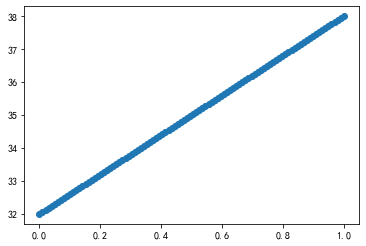

In [41]:
plt.scatter(x, y)

In [42]:
# 交叉检验
# 最简单的交叉检验形式为k-fold检验。
from sklearn.model_selection import KFold
data = np.array(['a',]*3 + ['b',]*3 + ['c',]*3)
data

array(['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'], dtype='<U1')

In [43]:
kf = KFold(3)  # 3折交叉检验
for train_idx, test_idx in kf.split(data):
    print(train_idx, test_idx)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [44]:
for trian_idx, test_idx in kf.split(data):
    print('training', data[train_idx])
    print('testing', data[test_idx])

training ['a' 'a' 'a' 'b' 'b' 'b']
testing ['a' 'a' 'a']
training ['a' 'a' 'a' 'b' 'b' 'b']
testing ['b' 'b' 'b']
training ['a' 'a' 'a' 'b' 'b' 'b']
testing ['c' 'c' 'c']


In [45]:
xi = np.linspace(0, 1, 30)
yi = np.sin(2*np.pi*xi)

In [46]:
xi.shape

(30,)

In [47]:
Xi = xi.reshape(-1, 1)
Xi.shape

(30, 1)

In [48]:
Yi = yi.reshape(-1, 1)
Yi.shape

(30, 1)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polyfitter = Pipeline([('poly', PolynomialFeatures(degree=3)),
                      ('linear', LinearRegression())])
polyfitter.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(degree=3)),
  ('linear', LinearRegression())],
 'verbose': False,
 'poly': PolynomialFeatures(degree=3),
 'linear': LinearRegression(),
 'poly__degree': 3,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'linear__copy_X': True,
 'linear__fit_intercept': True,
 'linear__n_jobs': None,
 'linear__normalize': 'deprecated',
 'linear__positive': False}

In [51]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(polyfitter, {'poly__degree':[1, 2, 3]},
                 cv=4, return_train_score=True)

In [52]:
gs.fit(Xi, Yi)
gs.cv_results_

{'mean_fit_time': array([0.00200403, 0.00075018, 0.00074303]),
 'std_fit_time': array([0.00174136, 0.00043313, 0.00042906]),
 'mean_score_time': array([0.00049514, 0.00024891, 0.00039005]),
 'std_score_time': array([0.00049514, 0.00043112, 0.00042032]),
 'param_poly__degree': masked_array(data=[1, 2, 3],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'poly__degree': 1}, {'poly__degree': 2}, {'poly__degree': 3}],
 'split0_test_score': array([ -2.03118491, -68.54947351,  -1.64899934]),
 'split1_test_score': array([-1.38557769, -3.20386236,  0.81372823]),
 'split2_test_score': array([ -7.82417707, -11.8740862 ,   0.47246476]),
 'split3_test_score': array([ -3.21714294, -60.70054797,   0.14328163]),
 'mean_test_score': array([ -3.61452065, -36.08199251,  -0.05488118]),
 'std_test_score': array([ 2.51765044, 28.84096377,  0.95040218]),
 'rank_test_score': array([2, 3, 1]),
 'split0_train_score': array([0.52652515, 0.93434227, 0.991

In [53]:
def yhat(x, w):
    return np.sign(np.dot(x, w))

In [54]:
npts = 100
X = np.random.rand(npts, 2)*6-3
labels = np.ones(X.shape[0], dtype=np.int)
labels[(X[:, 1]<X[:, 0])] = -1
X = np.c_[X, np.ones(X.shape[0])]

C:\Users\dell\AppData\Local\Temp\ipykernel_10868\3701917810.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = np.ones(X.shape[0], dtype=np.int)


In [55]:
X.shape

(100, 3)

In [56]:
X[:5]

array([[ 0.60156944, -1.24275193,  1.        ],
       [ 0.68428115,  1.26777043,  1.        ],
       [ 0.78583108, -2.46638536,  1.        ],
       [ 1.05401844,  1.57079268,  1.        ],
       [-2.25355852,  0.83181761,  1.        ]])

In [57]:
w = np.random.randn(3)
for i, j in zip(X, labels):
    w = w - (yhat(i, w)-j)*i

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(labels, [yhat(i, w) for i in X])

0.99

In [6]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=1234)

In [7]:
import matplotlib.pyplot as plt

In [13]:
plt.rcParams['font.family'] = 'DejaVu Sans'

In [64]:
X[:4]

array([[ 0.54824529, -0.401217  ],
       [ 1.86359348,  0.42757478],
       [ 0.63712192,  0.92089825],
       [ 1.19602709, -0.36936107]])

In [65]:
y[:4]

array([1, 1, 0, 1], dtype=int64)

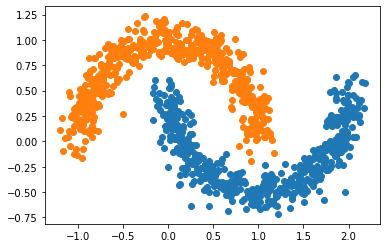

In [14]:
plt.scatter(X[y==1][:,0], X[y==1][:,1])
plt.scatter(X[y==0][:,0], X[y==0][:,1])

In [73]:
!pip install keras

In [16]:
xi = np.linspace(-10, 10, 100)

In [17]:
xi

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72